In [1]:
import tensorflow as tf

from sklearn.datasets import load_breast_cancer


In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.data.shape, data.target.shape

((569, 30), (569,))

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [6]:
N, D = x_train.shape

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [12]:
# Build model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(D,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [13]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=Adam())

In [14]:
r = model.fit(train_dataset.batch(32), validation_data=test_dataset.batch(32), epochs=10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3800 - loss: 0.7764 - val_accuracy: 0.8617 - val_loss: 0.5203
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9429 - loss: 0.4426 - val_accuracy: 0.9574 - val_loss: 0.3422
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9626 - loss: 0.2824 - val_accuracy: 0.9521 - val_loss: 0.2546
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9585 - loss: 0.2045 - val_accuracy: 0.9521 - val_loss: 0.2087
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9585 - loss: 0.1632 - val_accuracy: 0.9521 - val_loss: 0.1821
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9600 - loss: 0.1385 - val_accuracy: 0.9574 - val_loss: 0.1647
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9696 - loss: 0.1219 - val_accuracy: 0.9521 - val_loss: 0.1522
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9782 - loss: 0.1096 - val_accuracy: 0.9681 - val_loss

In [15]:
hist = r.history

In [17]:
import matplotlib.pyplot as plt

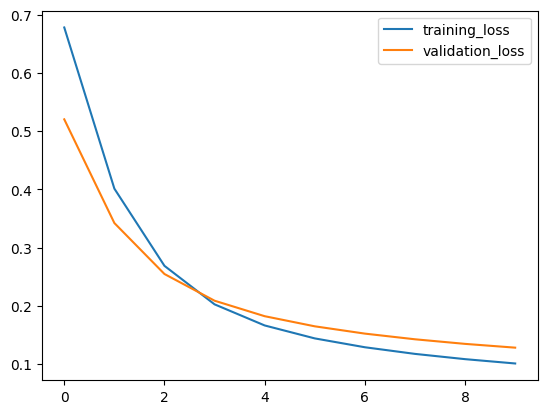

In [18]:
plt.plot(hist["loss"], label="training_loss")
plt.plot(hist["val_loss"], label="validation_loss")
plt.legend()

In [20]:
# Uso del metodo batch
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# batch in batches of size 3
batched = ds.batch(3)
batched

<_BatchDataset element_spec=TensorSpec(shape=(None,), dtype=tf.int32, name=None)>

In [21]:
for batch in batched:
    print(batch)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)
tf.Tensor([7 8 9], shape=(3,), dtype=int32)
tf.Tensor([10], shape=(1,), dtype=int32)


In [22]:
shuffled = ds.shuffle(buffer_size=3)
shuffled

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [23]:
for sh in shuffled:
    print(sh)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)


In [24]:
batched_shuffled = shuffled.batch(3)
for batch in batched_shuffled:
    print(batch)

tf.Tensor([2 1 3], shape=(3,), dtype=int32)
tf.Tensor([4 6 7], shape=(3,), dtype=int32)
tf.Tensor([ 9 10  5], shape=(3,), dtype=int32)
tf.Tensor([8], shape=(1,), dtype=int32)


In [25]:
for batch in batched_shuffled:
    print(batch)

tf.Tensor([2 3 4], shape=(3,), dtype=int32)
tf.Tensor([5 1 8], shape=(3,), dtype=int32)
tf.Tensor([6 7 9], shape=(3,), dtype=int32)
tf.Tensor([10], shape=(1,), dtype=int32)


In [27]:
# Il comportamento di shuffle viene chiamato ad ogni iterazione
for batch in batched_shuffled:
    print(batch)

tf.Tensor([1 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 3 8], shape=(3,), dtype=int32)
tf.Tensor([ 2  9 10], shape=(3,), dtype=int32)
tf.Tensor([7], shape=(1,), dtype=int32)


In [28]:
transformed = ds.map(lambda x: x/2)
batched_transf = transformed.batch(3)
for x in batched_transf:
    print(x)

tf.Tensor([0.5 1.  1.5], shape=(3,), dtype=float64)
tf.Tensor([2.  2.5 3. ], shape=(3,), dtype=float64)
tf.Tensor([3.5 4.  4.5], shape=(3,), dtype=float64)
tf.Tensor([5.], shape=(1,), dtype=float64)
